In [6]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

#!pip install missingno
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
from vector_corona import VectorizeCorona, CoronaProcessor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
v = VectorizeCorona()
vp = CoronaProcessor(v.activity_df, v.sleep_df)

In [59]:
merged_df = v.preprocess(vp)

In [60]:
merged_df

,index,subject_id,date,hour_00,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,...,rem_sleep,unrecognized_sleep_stage,total_interruption_duration,tib,tst,midsleep,sleep_eff,midsleep_hhmm,day_in_study,weekday
0,0,38758730,2021-07-02 03:00:00+03:00,0.039,0.000,0.000,0.000,0.000,0.000,0.000,...,4290,0,2070,7.266667,6.691667,2021-07-02 04:16:46.163000+03:00,0.921,28.266667,1,True
1,1,38758730,2021-07-03 03:00:00+03:00,0.002,0.028,0.000,0.000,0.000,0.000,0.000,...,5340,0,1800,6.808333,6.308333,2021-07-03 05:21:44.462000+03:00,0.927,29.350000,2,False
2,2,38758730,2021-07-04 03:00:00+03:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,6360,0,2130,8.983333,8.391667,2021-07-04 04:33:10.357000+03:00,0.934,28.550000,3,False
3,3,38758730,2021-07-05 03:00:00+03:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5430,0,1950,7.416667,6.875000,2021-07-05 02:53:50.162000+03:00,0.927,26.883333,4,True
4,4,38758730,2021-07-06 03:00:00+03:00,0.010,0.000,0.000,0.000,0.000,0.000,0.000,...,4800,0,2070,7.000000,6.425000,2021-07-06 03:39:56.029000+03:00,0.918,27.650000,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28460,28474,4278070280,2021-08-09 03:00:00+03:00,0.029,0.000,0.000,0.000,0.000,0.000,0.008,...,3990,0,930,5.600000,5.341667,2021-08-09 03:30:10.672000+03:00,0.954,27.500000,24,True
28461,28475,4278070280,2021-08-11 03:00:00+03:00,0.000,0.000,0.000,0.000,0.000,0.000,0.001,...,6330,900,2040,8.058333,7.491667,2021-08-11 03:15:13.881000+03:00,0.930,27.250000,25,True
28462,28476,4278070280,2021-08-12 03:00:00+03:00,0.000,0.000,0.000,0.000,0.000,0.000,0.001,...,10200,0,1770,9.350000,8.858333,2021-08-12 03:35:44.083000+03:00,0.947,27.583333,26,True
28463,28477,4278070280,2021-08-13 03:00:00+03:00,0.000,0.000,0.001,0.006,0.008,0.001,0.000,...,2460,0,750,4.350000,4.141667,2021-08-13 01:37:46.368000+03:00,0.952,25.616667,27,True


## Data availability

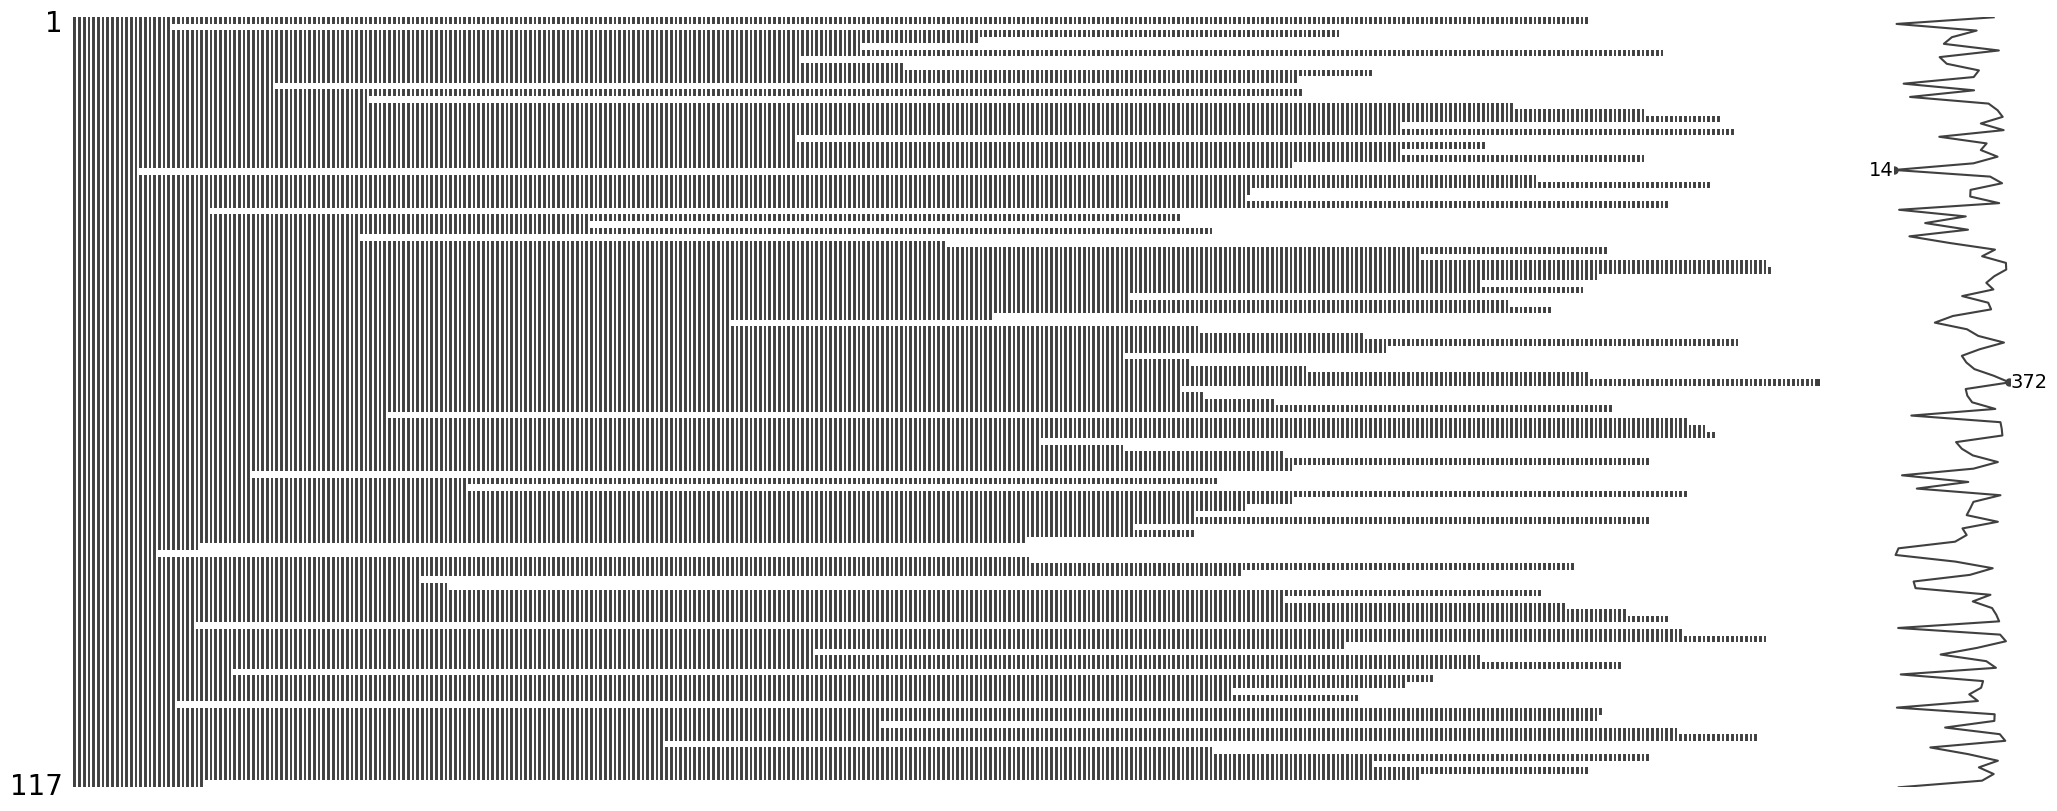

In [45]:
# Plot by day in study
pivot = pd.pivot_table(merged_df, index='subject_id', columns='day_in_study', values='tst')

# Days in study
fig = msno.matrix(pivot)
